In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA

In [2]:
code = 'KEL'
filename = lambda x: f'stockdata/{x}.csv'
read = filename(code)

df = pd.read_csv(read,delimiter='\t',header=None)
df.columns = ['Time','Open','High','Low','Close','Volume']
df['Time'] = pd.to_datetime(df['Time'],infer_datetime_format=True)
df.set_index('Time',inplace=True)
df = df[['Close']]

In [4]:
result = adfuller(df['Close'])
print(f'ADF statistics: {result[0]}')
print(f'P value: {result[1]}')

ADF statistics: -2.4228493464751018
P value: 0.13539092326015006


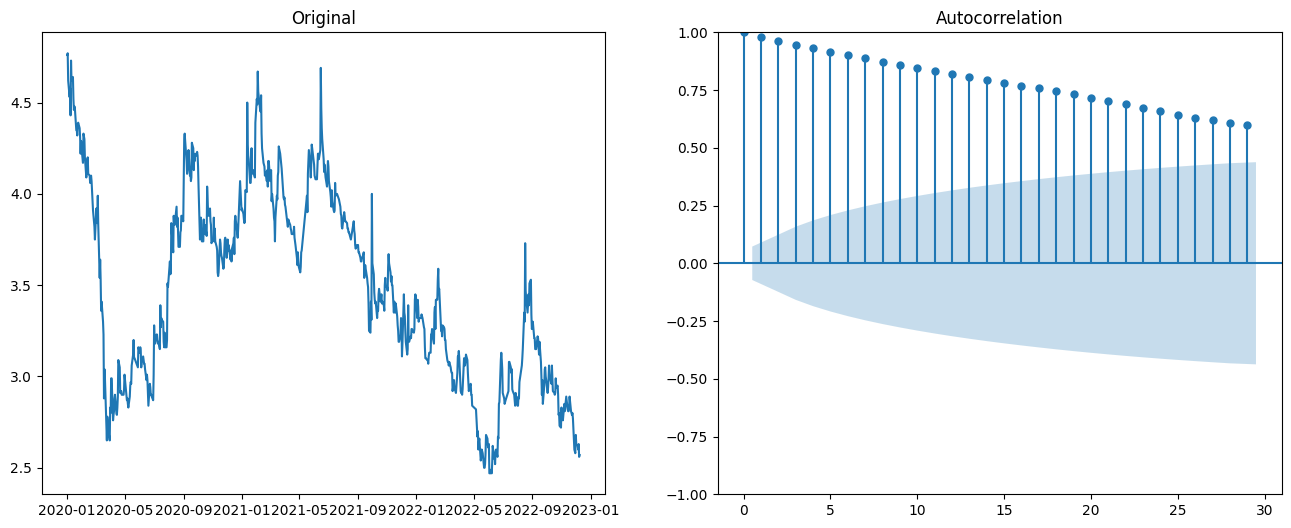

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(df['Close'])
ax1.set_title('Original')
plot_acf(df['Close'],ax=ax2);

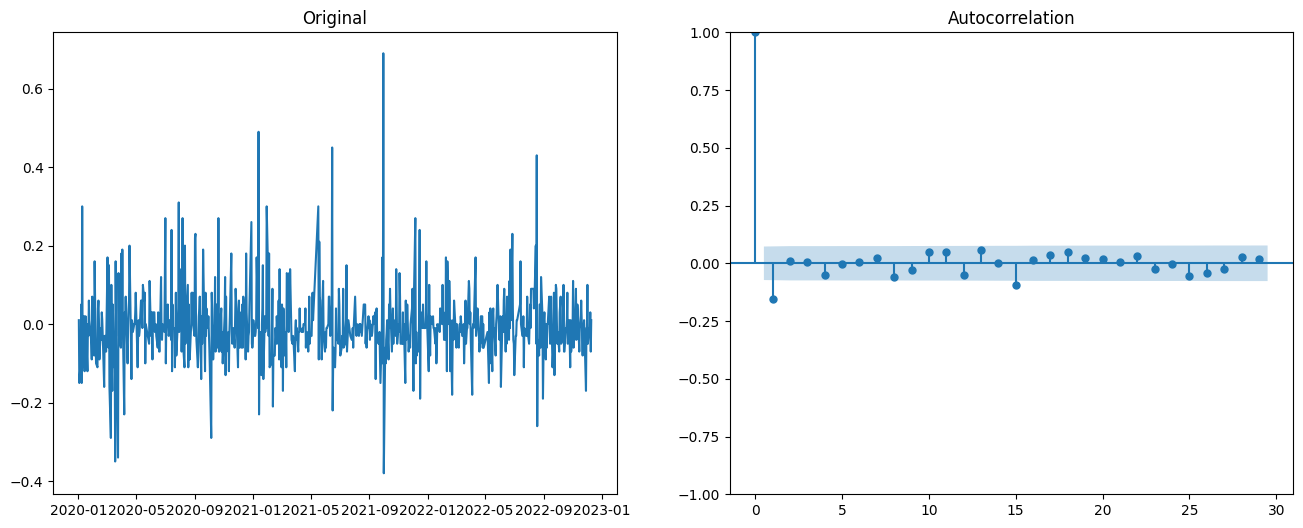

In [10]:
diff = df['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff)
ax1.set_title('Difference')
plot_acf(diff,ax=ax2);



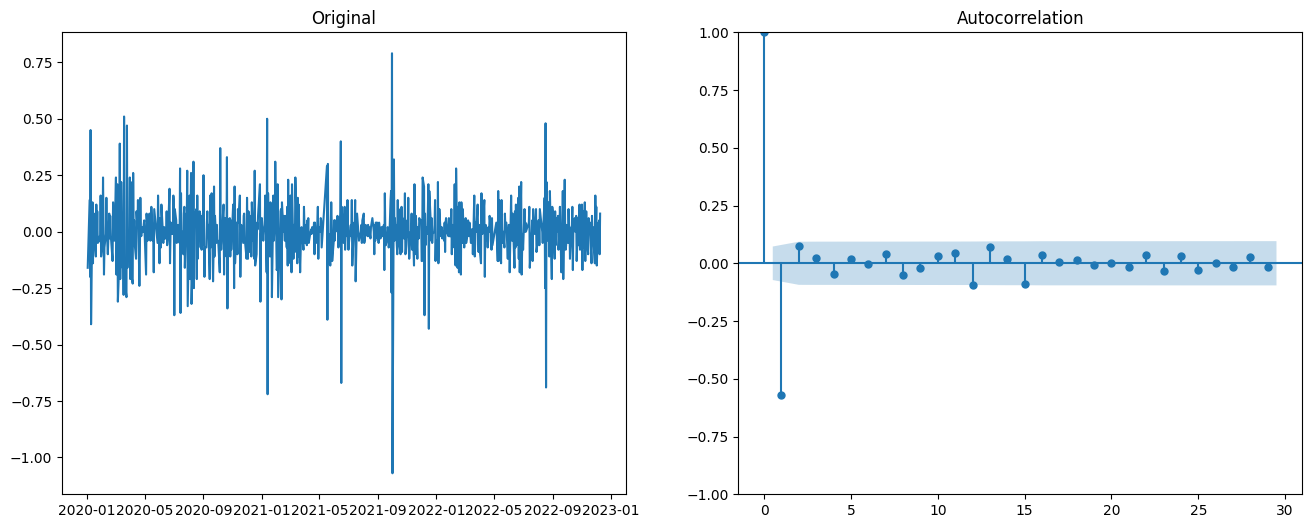

In [12]:
diff = df['Close'].diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_acf(diff,ax=ax2);

In [15]:
ndiffs(df['Close'],test='kpss'),ndiffs(df['Close'],test='adf'),ndiffs(df['Close'],test='pp')

(1, 1, 1)

In [16]:
d = 1

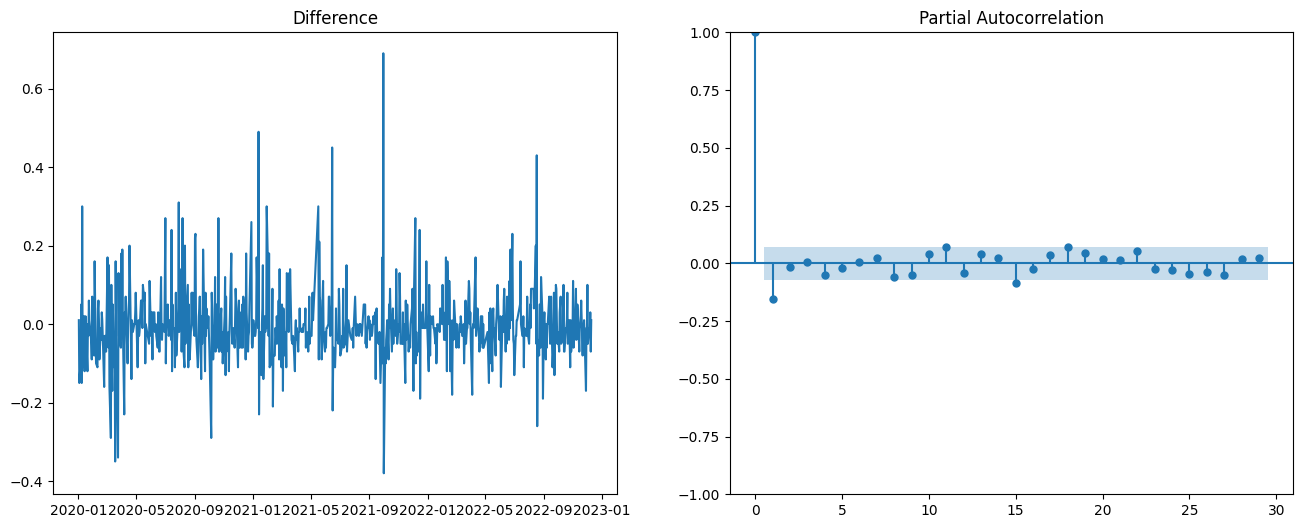

In [21]:
diff = df['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff)
ax1.set_title('Difference')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

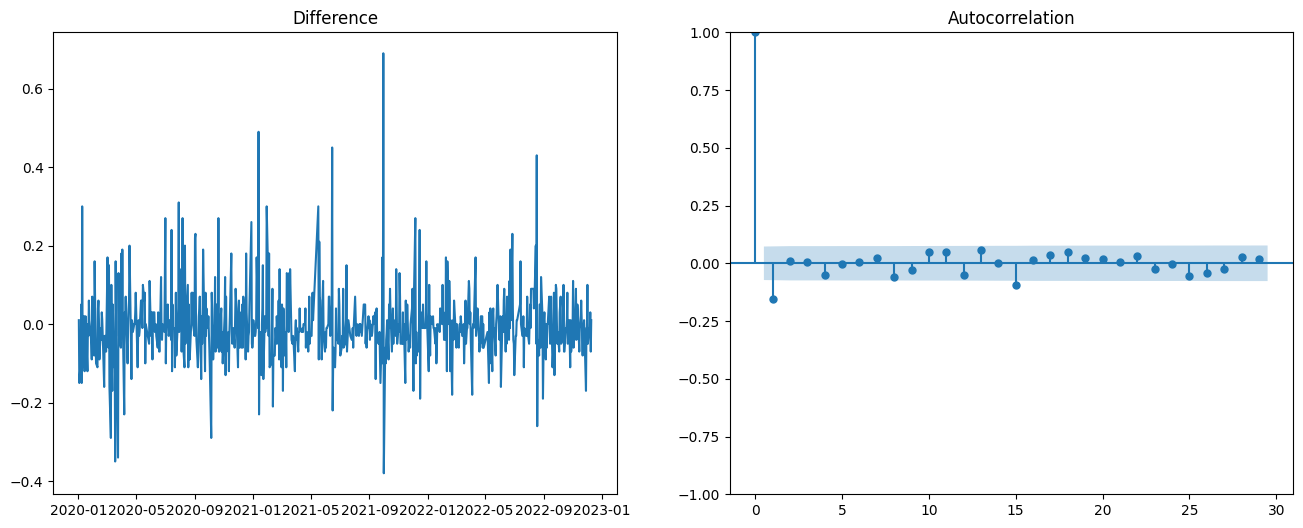

In [22]:
diff = df['Close'].diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff)
ax1.set_title('Difference')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [30]:
model = ARIMA(df['Close'],order=(1,1,1))
result = model.fit()

/home/daniyal/working/envs/ts/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/daniyal/working/envs/ts/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/daniyal/working/envs/ts/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 708.463
Date:                Mon, 26 Dec 2022   AIC                          -1410.926
Time:                        15:57:45   BIC                          -1397.147
Sample:                             0   HQIC                         -1405.610
                                - 731                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0782      0.208     -0.376      0.707      -0.486       0.330
ma.L1         -0.0775      0.212     -0.365      0.715      -0.494       0.339
sigma2         0.0084      0.000     37.854      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2001.20
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([1.84546255, 0.10148709, 0.00267071, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00267071]),
 array([-0.36218704,  0.15003167,  0.66225037,  1.17446907,  1.68668778,
         2.19890648,  2.71112518,  3.22334389,  3.73556259,  4.2477813 ,
         4.76      ]),
 <BarContainer object of 10 artists>)

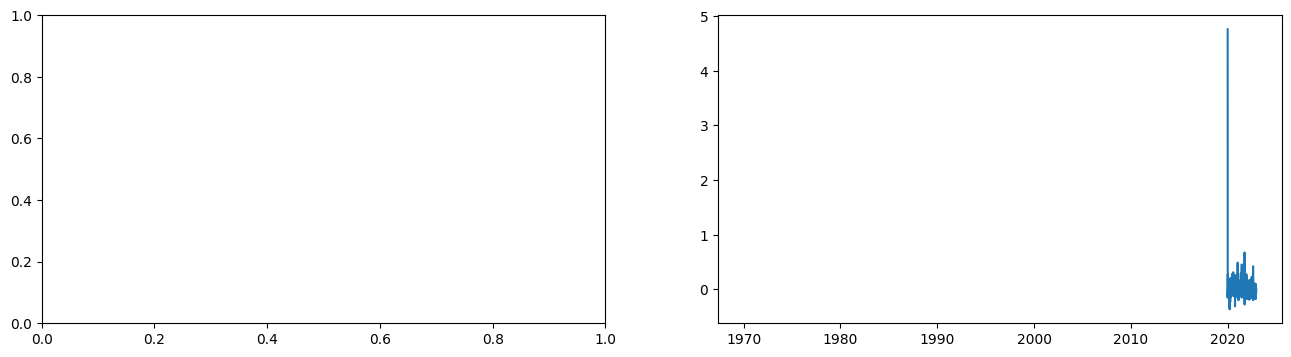

In [34]:
residuals = pd.DataFrame(result.resid)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax2.plot(residuals)
ax2.hist(residuals, density=True)